#Decision Tree

# Exploring the dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [ ]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#Drop the NaN values

In [ ]:
df = df.dropna().reset_index(drop=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


#Declare feature vector and target variable

In [ ]:
X = df.drop(['Potability'], axis=1)

y = df['Potability']

#Split data into separate training and test set

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((1407, 9), (604, 9))

#Decision Tree Classifier with criterion gini index 

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
#instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Predict the Test set results with criterion gini index

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

Check accuracy score with criterion gini index

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini) *100))

Model accuracy score with criterion gini index: 64.74


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

#Compare the train-set and test-set accuracy

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train_gini) *100))

Training-set accuracy score: 64.68


# Check for overfitting and underfitting

In [ ]:
print('Training set score: {:.2f}'.format(clf_gini.score(X_train, y_train) *100))

print('Test set score: {:.2f}'.format(clf_gini.score(X_test, y_test)*100))

Training set score: 64.68
Test set score: 64.74


#Visualize decision-trees

[Text(0.4230769230769231, 0.875, 'X[4] <= 260.121\ngini = 0.483\nsamples = 1407\nvalue = [833, 574]'),
 Text(0.15384615384615385, 0.625, 'X[2] <= 9094.993\ngini = 0.361\nsamples = 55\nvalue = [13, 42]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.23076923076923078, 0.375, 'X[0] <= 6.099\ngini = 0.291\nsamples = 51\nvalue = [9, 42]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.102\nsamples = 37\nvalue = [2, 35]'),
 Text(0.6923076923076923, 0.625, 'X[4] <= 387.328\ngini = 0.477\nsamples = 1352\nvalue = [820, 532]'),
 Text(0.5384615384615384, 0.375, 'X[1] <= 109.104\ngini = 0.47\nsamples = 1223\nvalue = [762, 461]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.468\nsamples = 1216\nvalue = [762, 454]'),
 Text(0.8461538461538461, 0.375, 'X[0] <= 7.907\ngini = 0.495\nsamples = 129\nvalue = [58, 7

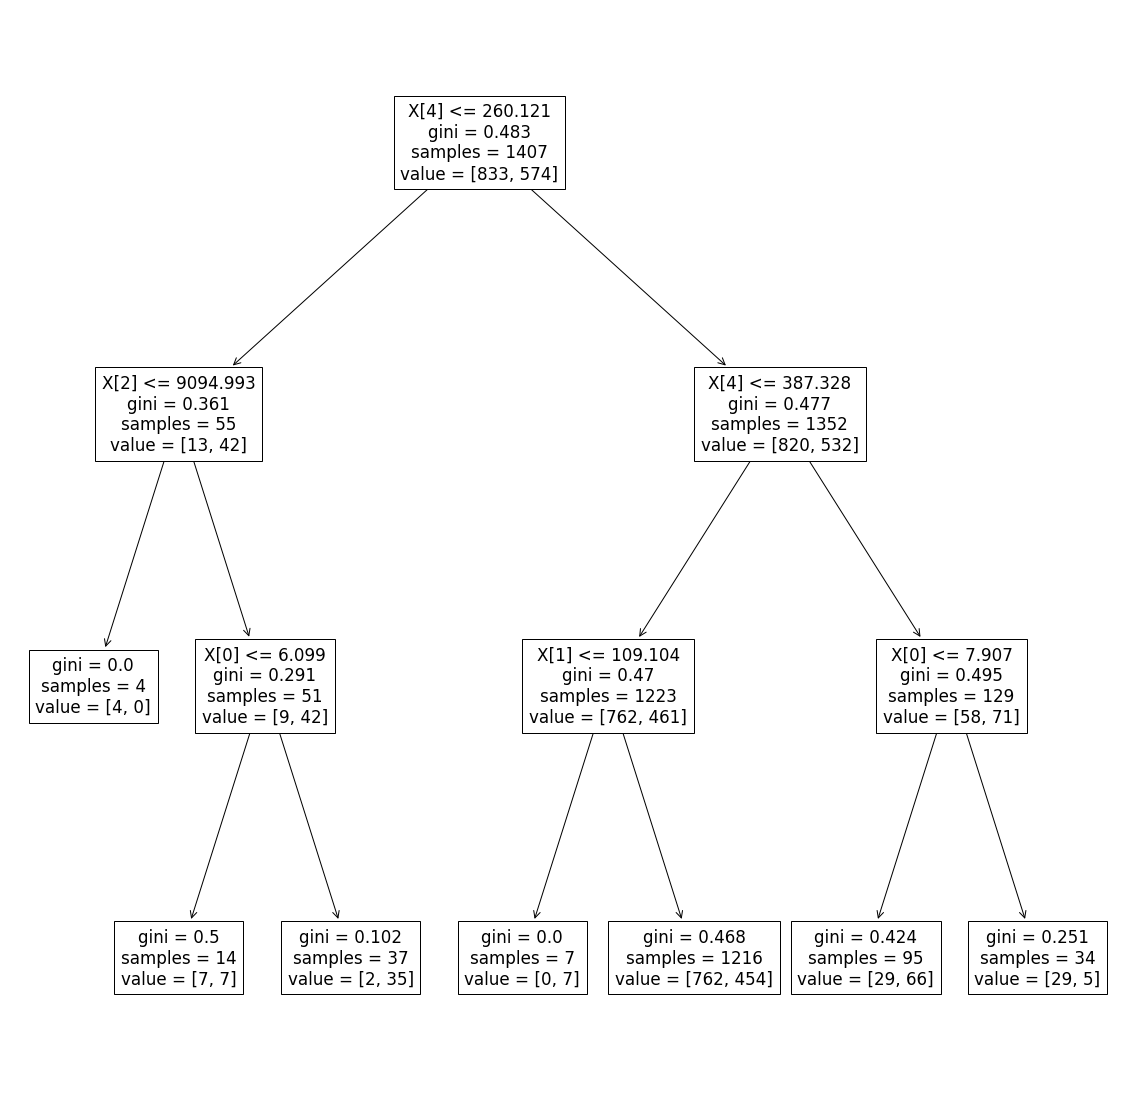

In [ ]:
plt.figure(figsize=(20, 20))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

#Results

In [ ]:
# Importing metrics of validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confuse Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_train, y_pred_train_gini), "\n")  

# Classification Report
print("Classification Report: \n", classification_report(y_train, y_pred_train_gini))  


# 
print('Model of the Accuracy: ' , (accuracy_score(y_train, y_pred_train_gini) *100))

Confusion Matrix: 
[[802  31]
 [466 108]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.96      0.76       833
           1       0.78      0.19      0.30       574

    accuracy                           0.65      1407
   macro avg       0.70      0.58      0.53      1407
weighted avg       0.69      0.65      0.58      1407

Model of the Accuracy:  64.6766169154229


#Decision Tree Classifier with criterion entropy 

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

#Predict the Test set results with criterion entropy

In [ ]:
y_pred_en = clf_en.predict(X_test)

#Check accuracy score with criterion entropy

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.2f}'. format(accuracy_score(y_test, y_pred_en)*100))

Model accuracy score with criterion entropy: 64.57


#Compare the train-set and test-set accuracy

In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train_en)*100))

Training-set accuracy score: 65.10


#Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.2f}'.format(clf_en.score(X_train, y_train) *100))

print('Test set score: {:.2f}'.format(clf_en.score(X_test, y_test)*100))

Training set score: 65.10
Test set score: 64.57


#Visualize decision-trees

[Text(0.4791666666666667, 0.9, 'X[4] <= 260.121\nentropy = 0.975\nsamples = 1407\nvalue = [833, 574]'),
 Text(0.2708333333333333, 0.7, 'X[0] <= 7.178\nentropy = 0.789\nsamples = 55\nvalue = [13, 42]'),
 Text(0.16666666666666666, 0.5, 'X[2] <= 18890.085\nentropy = 0.985\nsamples = 28\nvalue = [12, 16]'),
 Text(0.08333333333333333, 0.3, 'X[4] <= 229.044\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(0.041666666666666664, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.125, 0.1, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.25, 0.3, 'X[8] <= 3.898\nentropy = 0.811\nsamples = 20\nvalue = [5, 15]'),
 Text(0.20833333333333334, 0.1, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.2916666666666667, 0.1, 'entropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(0.375, 0.5, 'X[5] <= 543.17\nentropy = 0.229\nsamples = 27\nvalue = [1, 26]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.4166666666666667, 0.3, 'entropy = 0.0

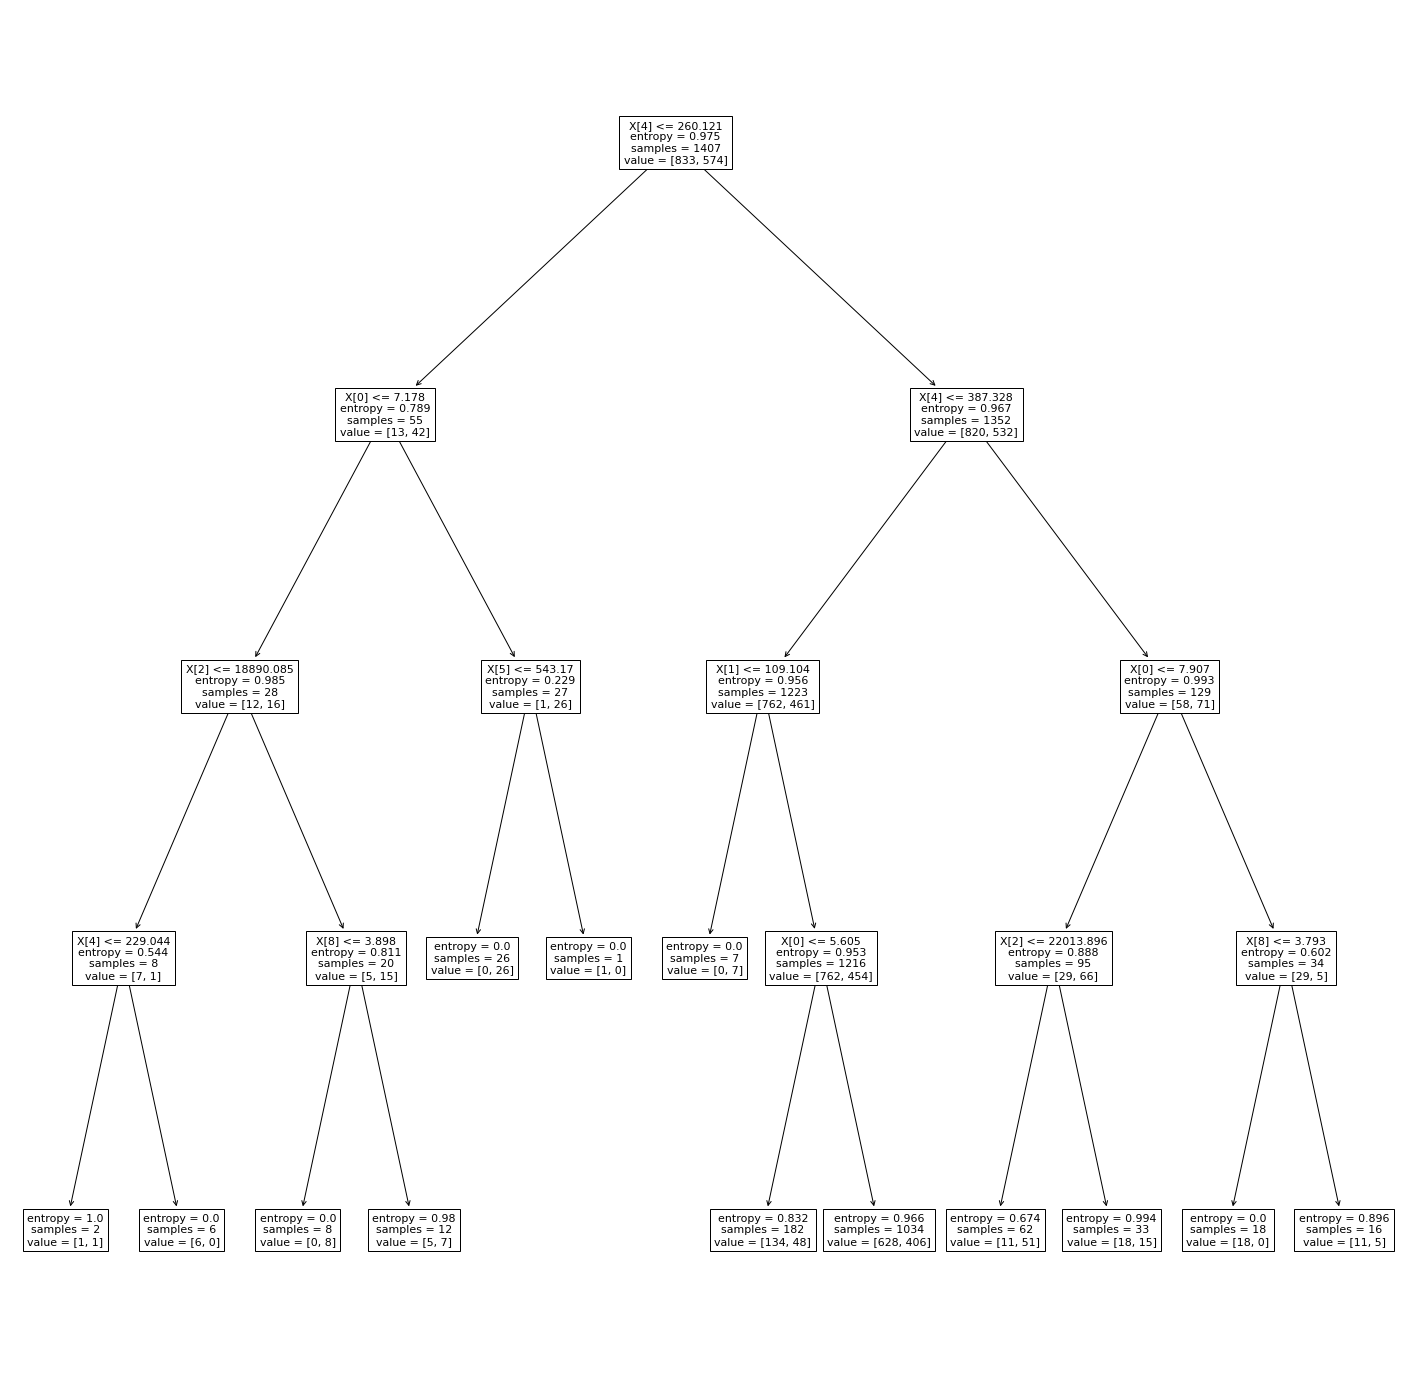

In [ ]:
plt.figure(figsize=(25,25))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

#Results

In [ ]:
# Importing metrics of validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confuse Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_train, y_pred_train_en), "\n")  

# Classification Report
print("Classification Report: \n", classification_report(y_train, y_pred_train_en))  


# 
print('Model of the Accuracy: ' , (accuracy_score(y_train, y_pred_train_en) *100))

Confusion Matrix: 
[[817  16]
 [475  99]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.98      0.77       833
           1       0.86      0.17      0.29       574

    accuracy                           0.65      1407
   macro avg       0.75      0.58      0.53      1407
weighted avg       0.73      0.65      0.57      1407

Model of the Accuracy:  65.10305614783228


#Referência

1. https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/notebook